<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/integrations/llm_providers/anyscale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

# Using UpTrain with Ollama's Open Source Models

[Ollama](https://ollama.com/) is a great solution to run large language models (LLMs) on your local system. 

Using Ollama you can run models like Llama, Gemma locally on your system.

In this tutorial we will walk you though running evaluations on UpTrain using your local models hosted on Ollama

## Prerequisites

1. Install Ollama to your system, you can download it from [here](https://ollama.com/download)


2. Pull the model using the command:

    ```
    ollama pull <model_name>
    ```
    
    For the list of models supported by Ollama you can refer [here](https://ollama.com/library)

3. You can enter http://localhost:11434/ in your web browser to confirm Ollama is running

## Import Necessay Packages

In [1]:
# %pip install uptrain -qU
from uptrain import EvalLLM, Evals, Settings
import json

/Users/shreyanshjain/Documents/UpTrain/GitHub_Clone/uptrain/.venv/lib/python3.11/site-packages/lazy_loader/__init__.py:185: RuntimeWarning: subpackages can technically be lazily loaded, but it causes the package to be eagerly loaded even if it is already lazily loaded.So, you probably shouldn't use subpackages with this lazy feature.
  warnings.warn(msg, RuntimeWarning)


## Create your data

You can define your data as a simple dictionary with the following keys:

- `question`: The question you want to ask
- `context`: The context relevant to the question
- `response`: The response to the question

In [2]:
data = [
   {
        'question': 'What is the capital of France?',
        'context': 'France, context for its exquisite pastries and fashion, has a capital city called Paris. It\'s a place where people speak French and enjoy baguettes. I once heard that the Eiffel Tower was built by aliens, but don\'t quote me on that.',
        'response': 'The capital of France is Paris.'
    }
]

### Define the model

We will be using Stable LM 2 1.6B for this example. You can refer the [documentation](https://ollama.com/library/stablelm2) on Ollama.

Remember to add "ollama/" at the beginning of the model name to let UpTrain know that you are using an Ollama model.

> **Note**: You can check if you have downloaded Stable LM 2 1.6B by running `!ollama list` <br><br> Else you can download it by `!ollama pull stablelm2`

In [3]:
settings = Settings(model='ollama/stablelm2')

### Create an EvalLLM Evaluator

Before we can start using UpTrain, we need to create an EvalLLM Evaluator. 

In [4]:
eval_llm = EvalLLM(settings)

We have used the following 3 metrics from UpTrain's library:

1. [Context Relevance](https://docs.uptrain.ai/predefined-evaluations/context-awareness/context-relevance): Evaluates how relevant the retrieved context is to the question specified.

2. [Response Conciseness](https://docs.uptrain.ai/predefined-evaluations/response-quality/response-conciseness): Evaluates how concise the generated response is or if it has any additional irrelevant information for the question asked..

3. [Response Relevance](https://docs.uptrain.ai/predefined-evaluations/response-quality/response-relevance): Evaluates how relevant the generated response was to the question specified.

You can look at the complete list of UpTrain's supported metrics [here](https://docs.uptrain.ai/predefined-evaluations/overview)

In [5]:
results = eval_llm.evaluate(
    project_name = 'Ollam-tutorial-test',
    data=data,
    checks=[Evals.CONTEXT_RELEVANCE, Evals.RESPONSE_CONCISENESS, Evals.RESPONSE_RELEVANCE]
)

100%|██████████| 1/1 [00:10<00:00, 10.69s/it]


### Get your results

In [6]:
from pprint import pprint
pprint(results, indent=3)

[  {  'context': 'France, context for its exquisite pastries and fashion, has '
                 "a capital city called Paris. It's a place where people speak "
                 'French and enjoy baguettes. I once heard that the Eiffel '
                 "Tower was built by aliens, but don't quote me on that.",
      'explanation_context_relevance': '{\n'
                                       '     "Reasoning": "The extracted '
                                       'context can answer the given query '
                                       'because it provides information about '
                                       "France's capital city, Paris. This "
                                       'information is relevant to answering '
                                       'the question about the capital of '
                                       'France.",\n'
                                       '     "Choice": "A"\n'
                                       '}',
      'explanation_

### Visualize Results

You can also visualize these results using our dashboards.

These dashboards are a part of our Open Source Offering. You can check it out on our [Github](https://github.com/uptrain-ai/uptrain).

You can run these dashboards locally on your system, check out our [documentation](https://docs.uptrain.ai/dashboard/getting_started) to get started.

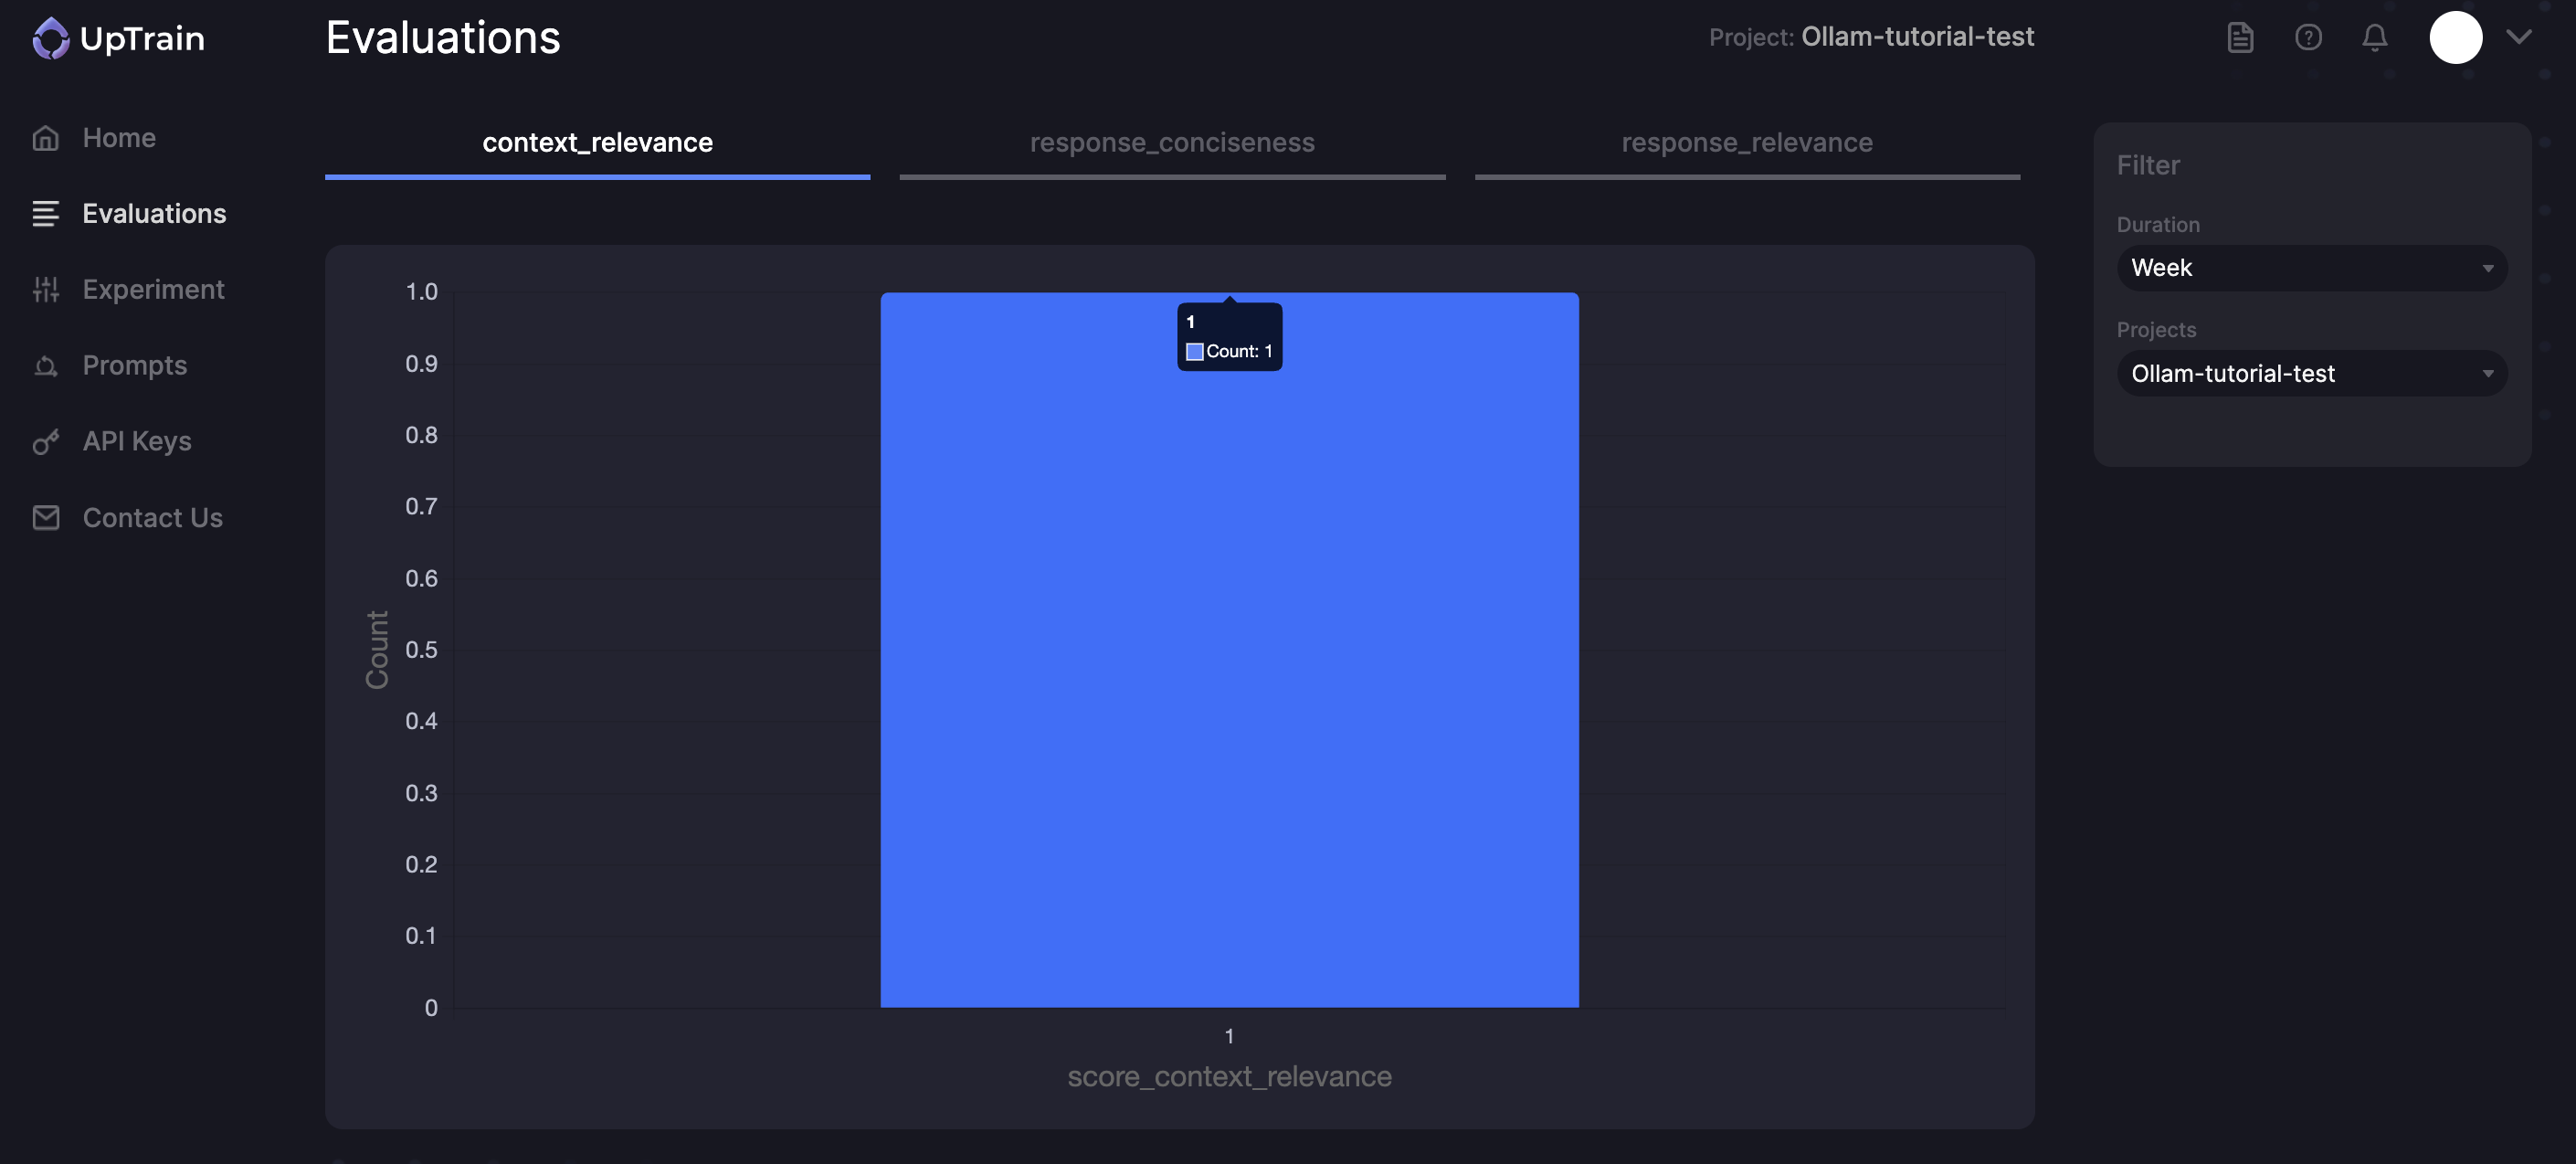
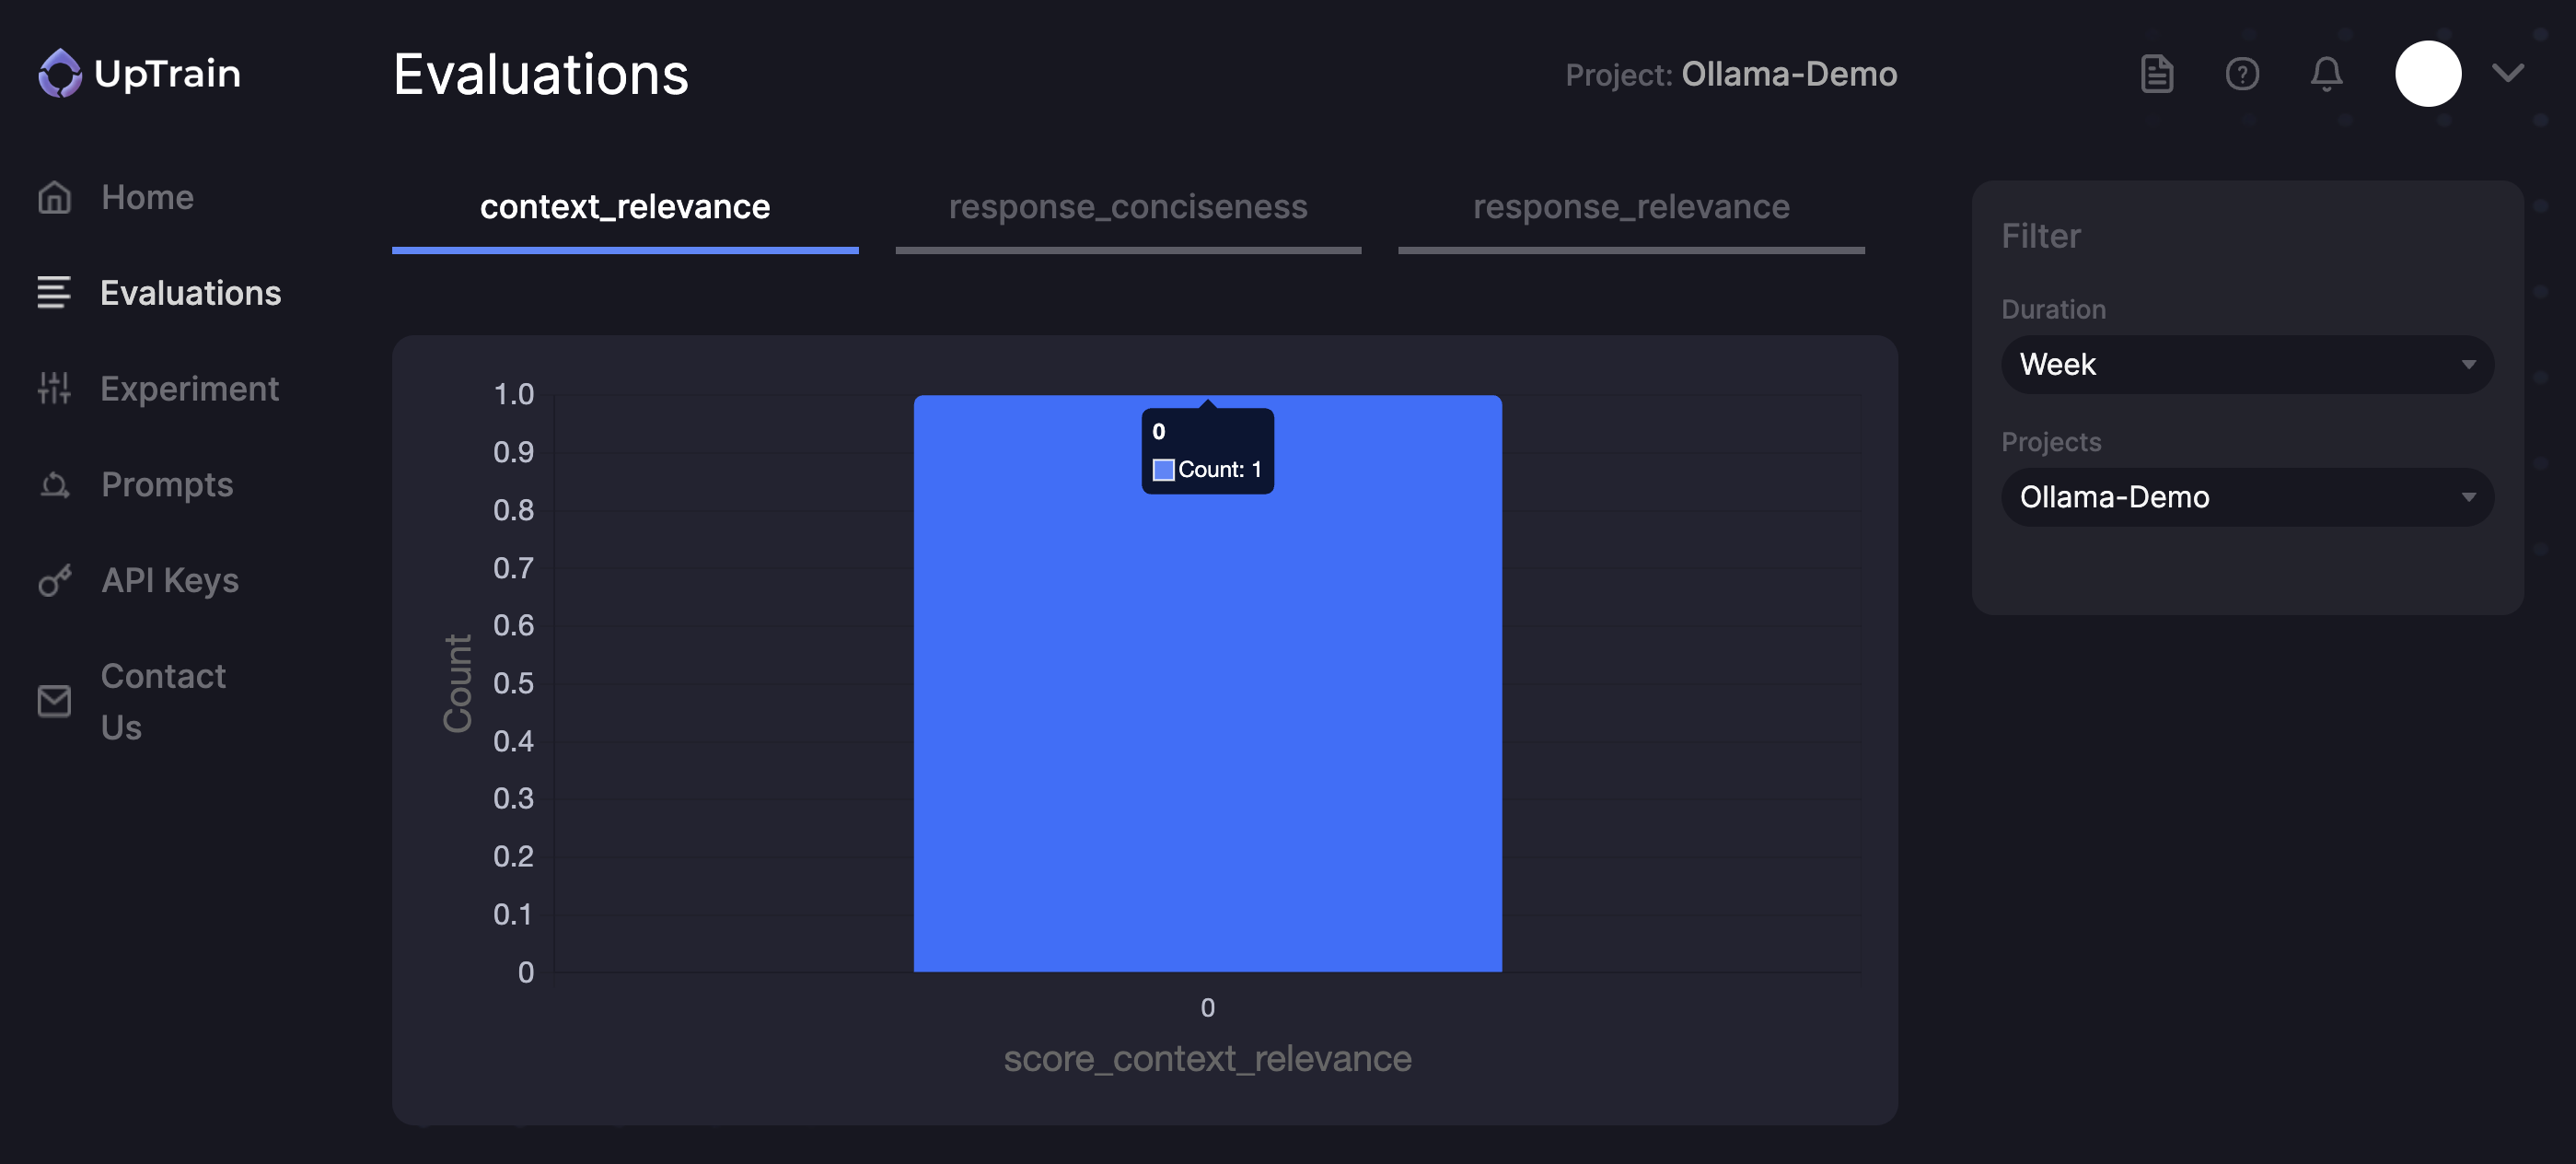